In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.externals import joblib
from sklearn import metrics

sys.path.append('../')
from visualization import roc_curve_plot, prediction_distribution_plot
from utils import read_csv_time_chunks
from feature_extraction import TimeDelta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
data = read_csv_time_chunks('/mnt/ml-team/minerva/talking_data/files',days=[8],hours=[3])
data = data.sample(10000)

100%|██████████| 1/1 [00:01<00:00,  1.77s/it]

read in chunk /mnt/ml-team/minerva/talking_data/files/train_day8_hour3.csv of shape (3172056, 8)


combined dataset shape: (3172056, 8)


In [159]:
time_deltas = TimeDeltas(groupby_specs=[['os','app'],['ip','channel']],
                        timestamp_column = 'click_time')

X_ = time_deltas.fit_transform(categorical_features=data[['os','app','ip','channel']],
                               timestamp_features=data[['click_time']])

In [160]:
X_['categorical_features']

,os_app_is_nan,ip_channel_is_nan
375478,0,1
2896033,0,1
2241788,0,1
108349,0,1
45300,0,1
1256308,0,1
2199678,0,1
549698,0,1
2368711,0,1
3020805,1,1


In [149]:
res.head()

ip            
5314   780370    NaN
14025  418690    NaN
33790  127086    NaN
63262  2311265   NaN
71542  384740    NaN
Name: click_time, dtype: float64

In [145]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,bla
1713042,973,18,1,22,107,2017-11-08 03:32:28,NaN,0,377.0
1581159,23526,9,2,66,215,2017-11-08 03:29:53,NaN,0,NaN
1016060,46619,9,1,13,334,2017-11-08 03:18:43,NaN,0,4.0
292435,41245,18,1,13,439,2017-11-08 03:04:43,NaN,0,33.0
3046668,112414,14,1,47,123,2017-11-08 03:57:44,NaN,0,160.0


In [100]:
EXPERIMENT_DIR = '/mnt/ml-team/minerva/talking_data/kuba/experiments/'
EXPERIMENT_NAME = 'baseline'

prediction_filepath = os.path.join(EXPERIMENT_DIR, EXPERIMENT_NAME, 'evaluation_predictions.csv')
evaluation_predictions =  pd.read_csv(prediction_filepath)

KeyboardInterrupt: 

In [3]:
evaluation_predictions.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,y_pred,score
0,115615,2,1,19,237,2017-11-07 05:27:49,NaN,0,0.404993,-0.519182
1,74120,15,1,13,140,2017-11-07 00:32:30,NaN,0,0.404993,-0.519182
2,49383,15,1,19,3,2017-11-07 00:32:30,NaN,0,0.404993,-0.519182
3,124794,12,1,17,140,2017-11-07 00:32:30,NaN,0,0.404993,-0.519182
4,209893,3,1,13,19,2017-11-07 00:32:30,NaN,0,0.404993,-0.519182


In [4]:
y_true = evaluation_predictions['is_attributed'].values
y_pred = evaluation_predictions['y_pred'].values

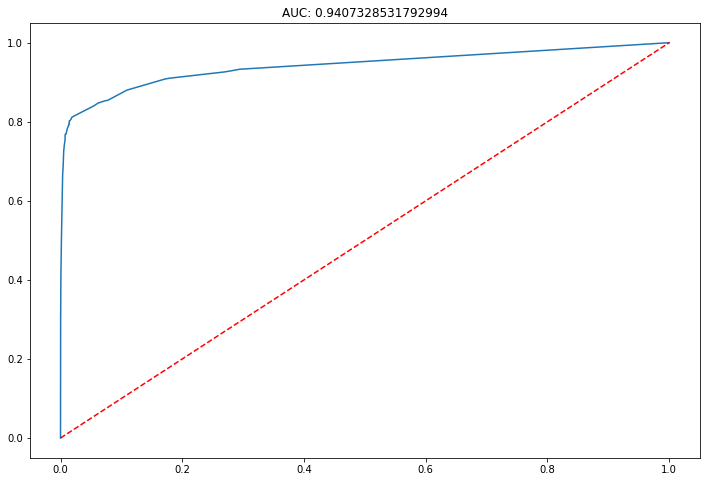

In [5]:
fig = roc_curve_plot(y_true, y_pred)

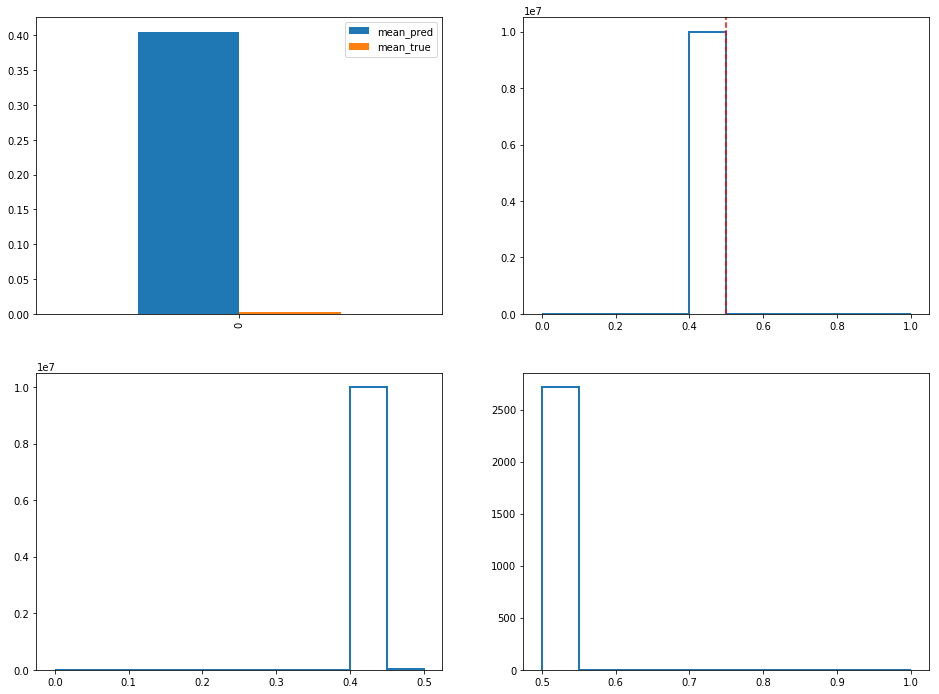

In [7]:
fig = prediction_distribution_plot(y_true, y_pred, sample=int(10e6), bins=10)